# Library importation

In [1]:
#Nettoyage/Visualisation des données
import pandas as pd
import pickle
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from astral import LocationInfo
from astral.sun import sun

import datetime

import os

print("ok")

/appli/conda-env/3.6/allohaEnv/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ok


# Data importation

In [2]:
base_de_donnees = "ml18_295b"

In [3]:
nom_dir = "/home/datawork-osmose/dataset/"+ base_de_donnees +"/analysis/getFeatures/14000/0.1H/"

ll = nom_dir + "complete.pkl"

[total_welch, total_tol, aux, total_time, frequencies] = pickle.load(open(ll, 'rb'))

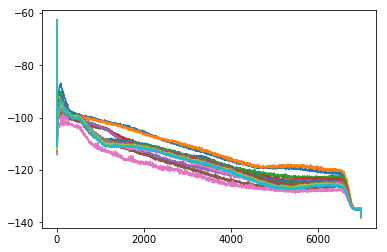

In [4]:
for i in range(20):
    plt.plot(frequencies,total_welch[i])
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

In [5]:
n = len(total_tol[0])
df_total_welch = pd.DataFrame(data = {'total_welch' : [total_welch[i] for i in range(len(total_welch))]})

def verif_nan(X) : 
    """Fonction qui vérifie si un tableau possède au moins un nan"""
    return X.apply(lambda x : np.isnan(x).sum()>0)

idx_nan = df_total_welch[df_total_welch.apply(lambda x : verif_nan(x)).total_welch==True].dropna().index.tolist()
df_total_welch = df_total_welch.drop(idx_nan, axis = 0).reset_index(drop=True)
len(idx_nan)

hour = []
day = []
month = []
year = []
for i in range(len(total_time)):
    hour.append(total_time[i][0].hour)
    day.append(total_time[i][0].day)
    month.append(total_time[i][0].month)
    year.append(total_time[i][0].year)
        
time = pd.DataFrame(data = {'year' : year, 'month' : month, 'day' : day, 'hour' : hour})
time = time.drop(idx_nan, axis = 0).reset_index(drop=True)

In [6]:
c11 = time.hour>22 
c12 = time.hour< 24
c1 = c11 & c12

c21 = time.hour <4
c22 = time.hour>0
c2 = c21 & c22

In [7]:
print(c1.sum()+c2.sum())
(c1 | c2).sum()

1117


1117

In [8]:
releves_nuit = np.where(((c1 | c2)*1).values==1)[0]

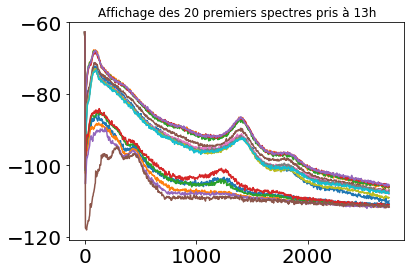

In [9]:
c11 = time.hour > 12
c12 = time.hour < 14
c1 = c11 & c12

c21 = time.hour > 12
c22 = time.hour < 14
c2 = c21 & c22

releves_nuit = np.where(((c1 | c2)*1).values==1)[0]

for i in range(20):
    plt.plot(frequencies[:800],total_welch[releves_nuit][i][:800])
    plt.title('Affichage des 20 premiers spectres pris à 13h')
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

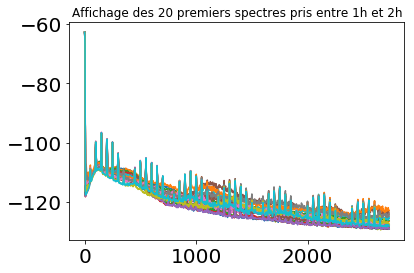

In [10]:
c11 = time.hour > 0
c12 = time.hour < 3
c1 = c11 & c12

c21 = time.hour > 0
c22 = time.hour < 3
c2 = c21 & c22

releves_nuit = np.where(((c1 | c2)*1).values==1)[0]

for i in range(20):
    plt.plot(frequencies[:800],total_welch[releves_nuit][i][:800])
    plt.title('Affichage des 20 premiers spectres pris entre 1h et 2h')

# Moyenne par heure 

In [11]:
df_total_welch['hour'] = time.hour

In [12]:
group_hour = df_total_welch.groupby(by=['hour'])
moy_jour = []
for key,item in group_hour:
    a_group = group_hour.get_group(key)
    moy_jour.append(np.mean(a_group.total_welch, axis=0))    

In [13]:
df_hour = pd.DataFrame(data={'hour':[i for i in range(len(moy_jour))], 'spectre':moy_jour})

In [14]:
moy_jour = np.asarray(moy_jour)

In [15]:
moy = []
ecart_type = []
moy_col = []
ec_type_col = []

for i in moy_jour :
    moy.append(np.mean(i))
    ecart_type.append(np.std(i))

for i in range(len(moy_jour[0])):
    moy_col.append(np.mean(moy_jour[0:24, i]))
    ec_type_col.append(np.std(moy_jour[0:24, i]))

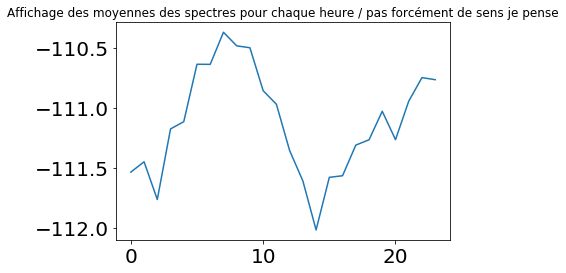

In [16]:
plt.title("Affichage des moyennes des spectres pour chaque heure / pas forcément de sens je pense")
plt.plot(moy)

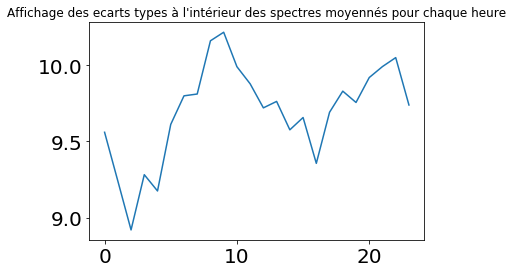

In [17]:
plt.title("Affichage des ecarts types à l'intérieur des spectres moyennés pour chaque heure")
plt.plot(ecart_type)

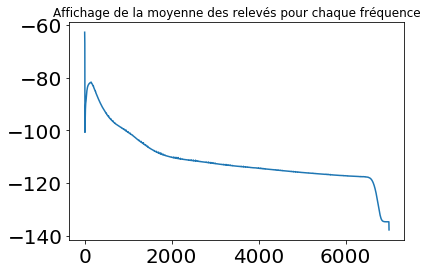

In [18]:
plt.title("Affichage de la moyenne des relevés pour chaque fréquence")
plt.plot(frequencies,moy_col)

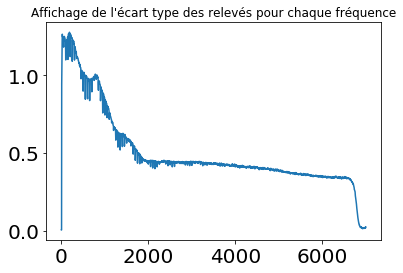

In [19]:
plt.title("Affichage de l'écart type des relevés pour chaque fréquence")
plt.plot(frequencies,ec_type_col)

# Recherche des heures du coucher du soleil

In [20]:
nom_dir = "/home/datawork-osmose/stage_Roman/coord_edm/" 

os.chdir(nom_dir)
os.getcwd()

'/home/datawork-osmose/stage_Roman/coord_edm'

In [21]:
df_coord = pd.read_csv(base_de_donnees + "_coord.csv")

In [22]:
group = df_coord.groupby(by=['year','month','day','hour'])
long_moy = []
lat_moy = []

for key,item in group:
    a_group = group.get_group(key)
    long_moy.append(np.mean(a_group.long))    
    lat_moy.append(np.mean(a_group.lat))

In [23]:
time_coord = df_coord[['year','month','day','hour']]
time_coord = time_coord.drop_duplicates(ignore_index=True)

In [24]:
coord_final = pd.DataFrame(data={"year":time_coord.year,'month':time_coord.month,'day':time_coord.day,'hour':time_coord.hour,'lat':lat_moy,'long':long_moy})

In [25]:
df_total_welch['year'] = time.year
df_total_welch['month'] = time.month
df_total_welch['day'] = time.day

In [26]:
group = df_total_welch.groupby(by=['year','month','day','hour'])
spectre = []

for key,item in group:
    a_group = group.get_group(key)
    spectre.append(np.mean(a_group.total_welch))

In [27]:
time = time.drop_duplicates(ignore_index=True)

In [28]:
welch_final = pd.DataFrame(data={'spectre':spectre,'year':time.year,'month':time.month,'day':time.day,'hour':time.hour})

In [29]:
data = coord_final.merge(welch_final, on = ['year', 'month', 'day', 'hour'])
data

,year,month,day,hour,lat,long,spectre
0,2018,10,22,21,-42.573267,-63.590069,"[-62.81323768037652, -67.21510923194447, -104...."
1,2018,10,22,22,-42.573370,-63.590211,"[-62.825936119205764, -67.22768352148965, -109..."
2,2018,10,22,23,-42.573310,-63.590171,"[-62.839996971593074, -67.24303447914782, -112..."
3,2018,10,23,0,-42.573316,-63.590240,"[-62.836323711300565, -67.23852126450865, -117..."
4,2018,10,23,1,-42.573336,-63.590330,"[-62.84133583391961, -67.24406866833522, -117...."
...,...,...,...,...,...,...,...
739,2018,11,23,13,-41.278755,-54.087746,"[-62.735164819540195, -67.13409969479731, -99...."
740,2018,11,23,14,-41.284838,-54.120619,"[-62.73950023407305, -67.14040314277777, -98.9..."
741,2018,11,23,15,-41.294643,-54.160182,"[-62.74034840394832, -67.14074614732053, -99.6..."
742,2018,11,23,16,-41.303352,-54.198824,"[-62.74254680019776, -67.14415058185828, -99.6..."


In [30]:
def recup_sunset(x):
    city = LocationInfo(latitude=x.lat, longitude=x.long)
    year=x.year
    month=x.month
    day=x.day
    return sun(city.observer, date=datetime.date(year,month,day))['sunset']

In [31]:
h_sunset = []
for i in range(len(data)):
    h_sunset.append(recup_sunset(data.loc[i]).hour)

In [32]:
data['sunset'] = h_sunset
data.head()

,year,month,day,hour,lat,long,spectre,sunset
0,2018,10,22,21,-42.573267,-63.590069,"[-62.81323768037652, -67.21510923194447, -104....",22
1,2018,10,22,22,-42.573370,-63.590211,"[-62.825936119205764, -67.22768352148965, -109...",22
2,2018,10,22,23,-42.573310,-63.590171,"[-62.839996971593074, -67.24303447914782, -112...",22
3,2018,10,23,0,-42.573316,-63.590240,"[-62.836323711300565, -67.23852126450865, -117...",22
4,2018,10,23,1,-42.573336,-63.590330,"[-62.84133583391961, -67.24406866833522, -117....",22


# Nouveau plot toutes les 4 et 6h

In [33]:
moy6 = []
for i in range(int(len(moy_jour)/4)):
    moy6.append(np.mean(moy_jour[i:i+6], axis = 0))

moy4 = []
for i in range(int(len(moy_jour)/6)):
    moy4.append(np.mean(moy_jour[i:i+4], axis = 0))

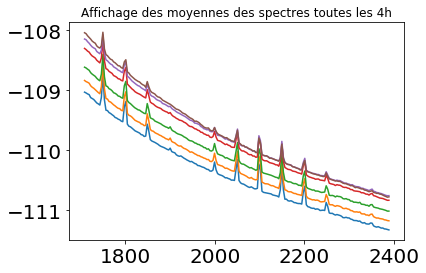

In [34]:
plt.title("Affichage des moyennes des spectres toutes les 4h")
for i in moy6 :
    plt.plot(frequencies[500:700],i[500:700])
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

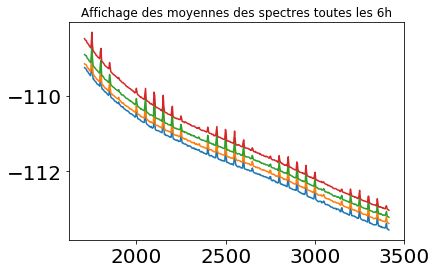

In [35]:
plt.title("Affichage des moyennes des spectres toutes les 6h")
for i in moy4 :
    plt.plot(frequencies[500:1000],i[500:1000])
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

# Affichage en prenant en compte l'heure de coucher du soleil

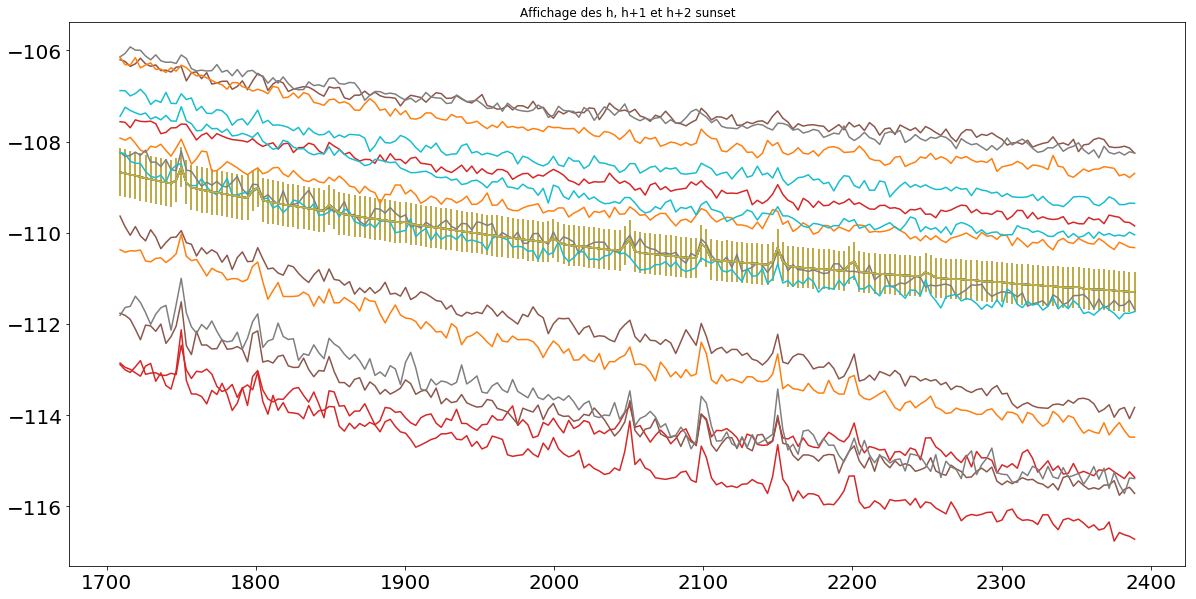

In [36]:
c1 = data['sunset']==data['hour']

c2 = data['sunset']+1==data['hour']

c3 = data['sunset']+2==data['hour']

heure_sunset = np.where(((c1 | c2 | c3)*1).values==1)[0]

affi_sunset = data.loc[heure_sunset].reset_index(drop=True)

for i in range(15,30):
    plt.figure(1,figsize=(20,10))
    plt.title("Affichage des h, h+1 et h+2 sunset")
    plt.errorbar(x=frequencies[500:700], y = moy_col[500:700],yerr=ec_type_col[500:700])
    plt.plot(frequencies[500:700],affi_sunset.loc[i].spectre[500:700])
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

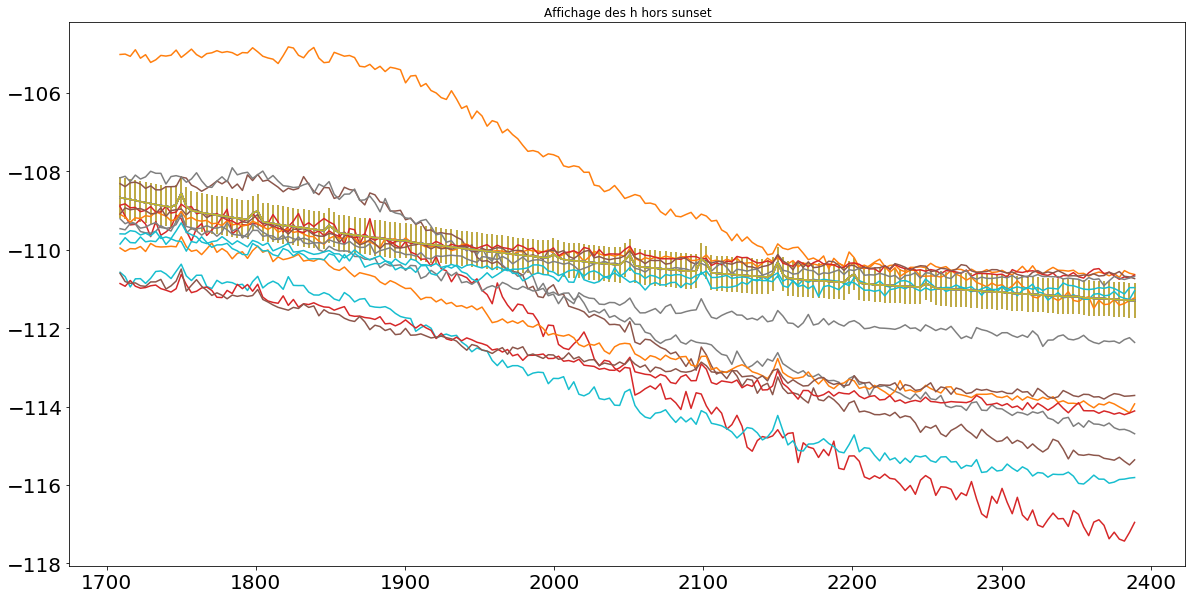

In [37]:
c1 = data['sunset']!=data['hour']

c2 = data['sunset']+1!=data['hour']

c3 = data['sunset']+2!=data['hour']

heure_sunset = np.where(((c1 | c2 | c3)*1).values==1)[0]

affi_no_sunset = data.loc[heure_sunset].reset_index(drop=True)

for i in range(15,30):
    plt.figure(1,figsize=(20,10))
    plt.title("Affichage des h hors sunset")
    plt.errorbar(x=frequencies[500:700], y=moy_col[500:700], yerr=ec_type_col[500:700])
    plt.plot(frequencies[500:700],affi_no_sunset.loc[i].spectre[500:700])
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

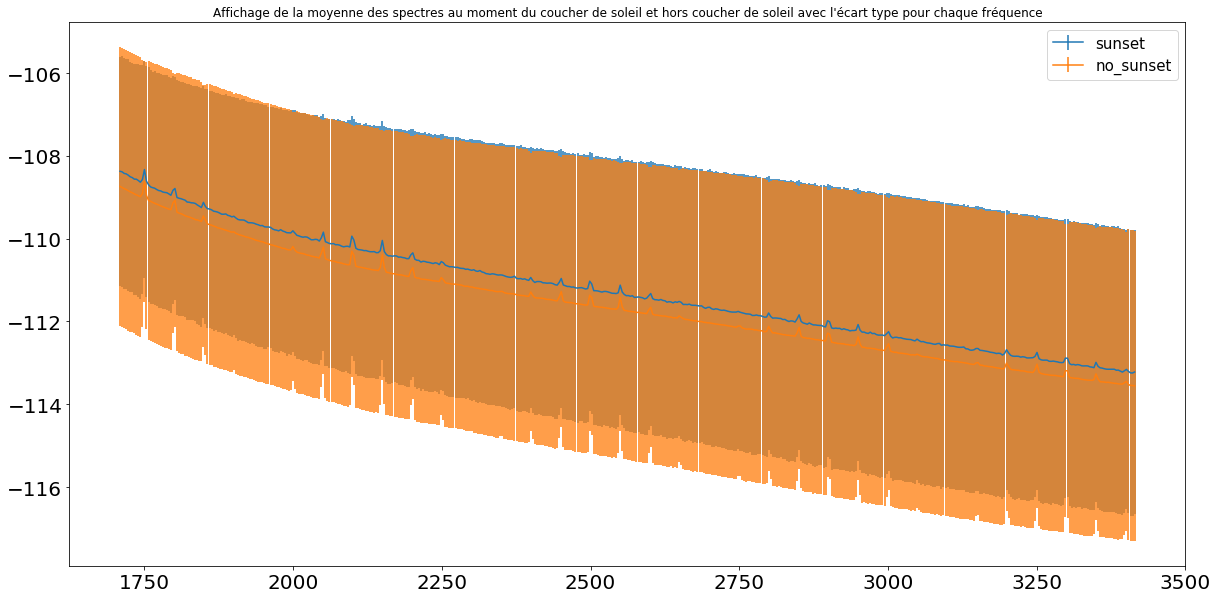

In [38]:
v = affi_sunset.spectre.values.tolist()

moy_col_sunset = np.mean(v,axis=0)
ec_col_sunset = np.std(v,axis=0)

w = affi_no_sunset.spectre.values.tolist()

moy_col_no_sunset = np.mean(w,axis=0)
ec_col_no_sunset = np.std(w,axis=0)

plt.figure(1,figsize=(20,10))
plt.title("Affichage de la moyenne des spectres au moment du coucher de soleil et hors coucher de soleil avec l'écart type pour chaque fréquence")
plt.errorbar(x=frequencies[500:1000], y=moy_col_sunset[500:1000], yerr=ec_col_sunset[500:1000], label='sunset')
#plt.errorbar(x=frequencies[500:1000], y=moy_col[500:1000], yerr=ec_type_col[500:1000], label="moyenne et e-t de l'ensemble des spectres")
plt.errorbar(x=frequencies[500:1000], y=moy_col_no_sunset[500:1000], yerr=ec_col_no_sunset[500:1000], label='no_sunset')
plt.legend(loc='best', fontsize=15)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)